In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

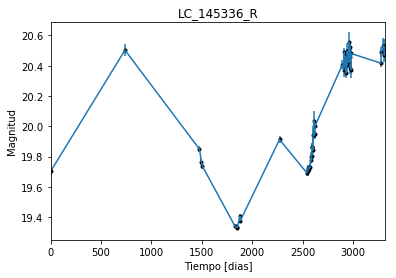

In [2]:
data = np.genfromtxt('LC_145336_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_145336_R')
plt.savefig("LC_145336_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

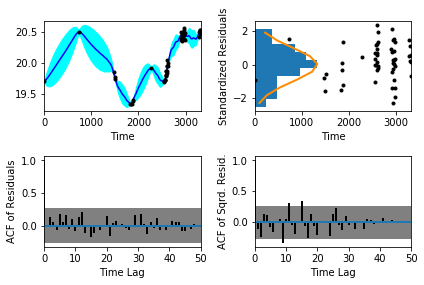

In [5]:
sample.assess_fit()

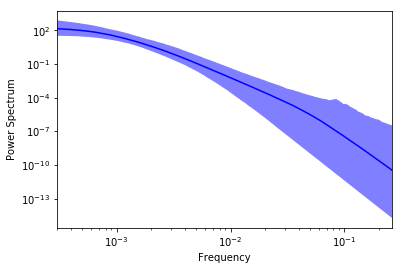

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

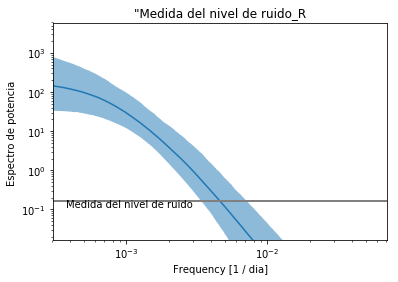

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_145336_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_145336_R')

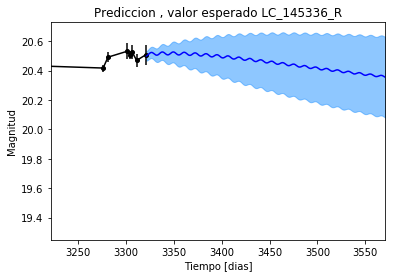

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_145336_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_145336_R')

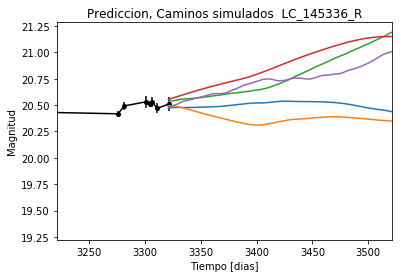

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_145336_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


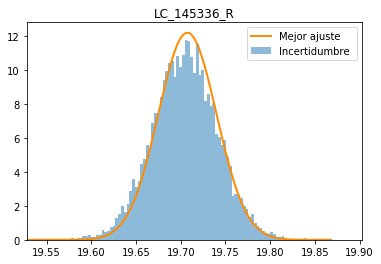

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_145336_R')
plt.savefig("Mejor_ajuste_LC_145336_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_145336_R')

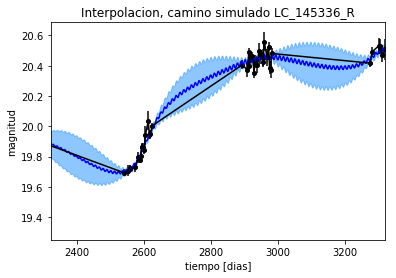

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_R')

Text(0.5,1,'Interpolacion, camino simulado LC_145336_R')

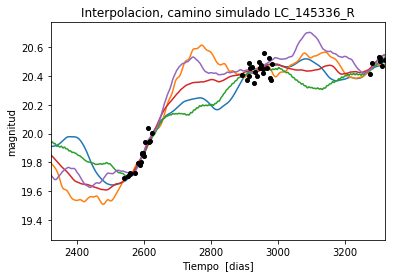

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 530.426612924
Median: 0.0113323390215
Standard deviation: 0.108538288683
68% credibility interval: [ 0.00104475  0.14150164]
95% credibility interval: [  3.78213484e-04   4.07431165e-01]
99% credibility interval: [  3.15302678e-04   4.86192396e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 277.452128505
Median: 0.0013862949109
Standard deviation: 0.0393824688376
68% credibility interval: [ 0.00047342  0.01090572]
95% credibility interval: [ 0.00032644  0.11315622]
99% credibility interval: [  3.06680637e-04   3.10733265e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 630.384335874
Median: 0.00525458426851
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1251.25177693
Median: 94.4468180006
Standard deviation: 1.60018704846
68% credibility interval: [ 92.62049846  95.62948268]
95% credibility interval: [ 90.24597156  96.26707555]
99% credibility interval: [ 88.45349122  96.81577552]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 364.5016211
Median: 0.415650813008
Standard deviation: 1.02417408389
68% credibility interval: [ 0.04312421  1.93911567]
95% credibility interval: [ 0.01416997  3.43844171]
99% credibility interval: [ 0.00989546  4.69240593]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 360.816704275
Median: 0.105249436338
Standard deviation: 1.76862353761
68% credibility interval: [ 0.00752686  1.11046839]
95% credibility interval: [  8.70644078e-04 

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 591.438677768
Median: 5.67079437e-25
Standard deviation: 5.54734492463e+69
68% credibility interval: [  1.96508588e-60   5.94715717e-06]
95% credibility interval: [  1.80684610e-91   4.36797967e+01]
99% credibility interval: [  5.71957946e-99   1.86486276e+68]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2235.47143074
Median: 20.0571027717
Standard deviation: 0.271891100231
68% credibility interval: [ 19.8401383   20.28630118]
95% credibility interval: [ 19.54253778  20.63680041]
99% credibility interval: [ 19.23523722  20.9735427 ]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 396.504338016
Median: 0.000478463063028
Standard deviation: 0.103062355658
68% credibility interval: [ 0.          0.10899952]
95% credibility interval: [ 0.          0.39452704]
99% credibility interval: [ 0.          0.49091531]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 396.504338016
Median: 0.000478463063028
Standard deviation: 0.103062355658
68% credibility interval: [ 0.          0.10899952]
95% credibility interval: [ 0.          0.39452704]
99% credibility interval: [ 0.          0.49091531]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 8124.02336932
Median: 0.0
Standard deviation: 0.000277925317221
68

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1251.25177693
Median: 94.4468180006
Standard deviation: 1.60018704846
68% credibility interval: [ 92.62049846  95.62948268]
95% credibility interval: [ 90.24597156  96.26707555]
99% credibility interval: [ 88.45349122  96.81577552]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2770.56179249
Median: 0.253407239354
Standard deviation: 0.31059143936
68% credibility interval: [ 0.13916794  0.51085425]
95% credibility interval: [ 0.08595312  1.15011185]
99% credibility interval: [ 0.06772585  1.86069554]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1919.57196778
Median: 1.16117900995
Standard deviation: 0.184327190735
68% credibility interval: [ 1.00461366  1.36020266]
95% credibility interval: [ 0.88236604  1.60658531]
99% credibility interval: [ 0.80161914  1.75129492]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 682.903616049
Median: 3.88282630693e-05
Standard deviation: 0.000767768849392
68% credibility interval: [  2.20377048e-06   4.41082014e-04]
95% credibility interval: [  7.81289759e-08   2.70561109e-03]
99% credibility interval: [  1.60070054e-73   4.83648749e-03]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 530.426612924
Median: (-0.071203186036-0.0539361226044j)
Standard deviation: 0.94043163934
68% credibility interval: [-0.88908105-0.66162416j -0.00656436+0.j        ]
95% credibility interval: [ -2.55996551e+00+0.j         -2.37638541e-03-0.0027991j]
99% credibility interval: [ -3.05483692e+00+0.j          -1.98110515e-03-0.30038427j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 277.452128505
Median: (-0.00871034781558+0.0100224884022j)
Standard deviation: 0.693227226405
68% credibility interval: [-0.06852266 +6.28588112e-01j -0.00297456 +5.43603117e-04j]
95% credibility interval: [-0.71098152+0.49407j    -0.00205108+2.57270358j]
99% credibility interval: [ -1.95239468e+00+1.24204211j  -1.92693127e-03+0.j        ]
P